<a href="https://colab.research.google.com/github/ibrahim10sy/learn-python/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classificateur K-plus proches voisins (KNN)**

# **Objectifs**

* Utiliser les K-plus proches voisins pour classer les données
* Appliquer le classificateur KNN à un ensemble de données réelles

In [ ]:
!pip install numpy==2.2.0
!pip install pandas==2.2.3
!pip install scikit-learn==1.6.0
!pip install matplotlib==3.9.3
!pip install seaborn==0.13.2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
%matplotlib inline

# **À propos du jeu de données**

Imaginez qu'un opérateur de télécommunications ait segmenté sa clientèle selon ses habitudes d'utilisation des services, en la classant en quatre groupes. Si les données démographiques permettent de prédire l'appartenance à un groupe, l'entreprise peut personnaliser ses offres pour chaque client potentiel. Il s'agit d'un problème de classification. En d'autres termes, à partir d'un ensemble de données et de libellés prédéfinis, nous devons construire un modèle permettant de prédire la classe d'un cas nouveau ou inconnu.

L'exemple se concentre sur l'utilisation de données démographiques, telles que la région, l'âge et le statut matrimonial, pour prédire les habitudes d'utilisation.

Le champ cible, appelé custcat, propose quatre catégories de services possibles correspondant aux quatre groupes de clients :

Service de base
Service électronique
Service supplémentaire
Service total
Notre objectif est de construire un classificateur permettant de prédire la catégorie de service des cas inconnus. Nous utiliserons un type de classification spécifique appelé K plus proches voisins.

In [2]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [3]:
labels = df.custcat.unique()

In [4]:
labels

array([1, 4, 3, 2])

In [13]:
sizes = df.custcat.value_counts().values

In [14]:
sizes

array([281, 266, 236, 217])

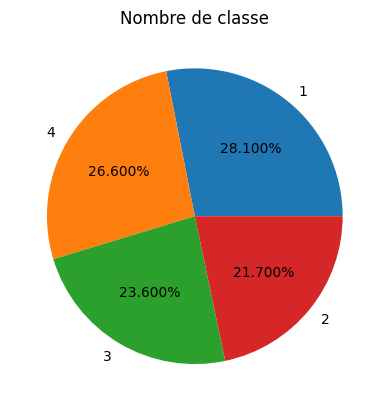

In [15]:
fig, ax = plt.subplots()
ax.pie(sizes,labels=labels, autopct='%1.3f%%')
ax.set_title('Nombre de classe')
plt.show()

Nous pouvons donc affirmer que nous disposons d'enregistrements de **281 clients** ayant opté pour les services Plus, **266 pour les services de base**, **236 pour les services complets** et **217 pour les services électroniques**. On constate donc que l'ensemble de données est globalement équilibré entre les différentes classes et ne nécessite aucune mesure particulière pour tenir compte des biais de classe.

<Axes: >

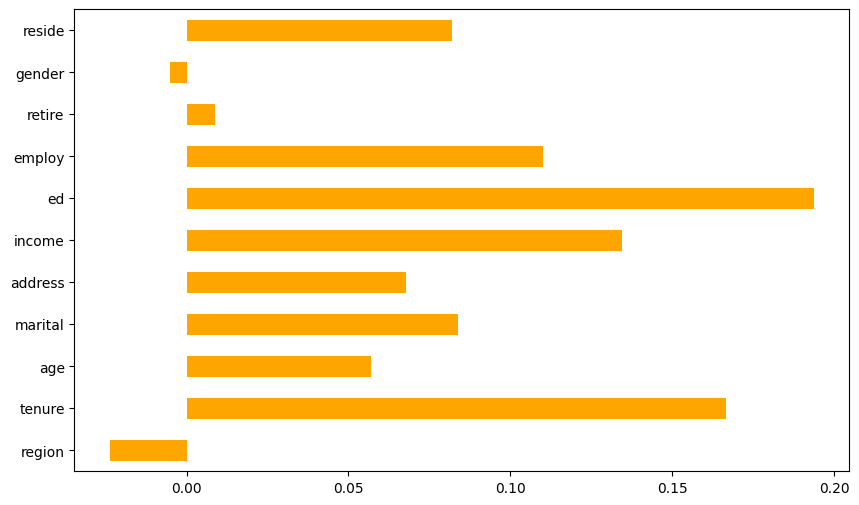

In [21]:
correlation_value = df.corr()['custcat'].drop('custcat')
correlation_value.plot(kind='barh', color='orange',figsize=(10, 6))

In [24]:
correlation_val = abs(df.corr()['custcat'].drop('custcat')).sort_values(ascending=False)
correlation_val

,custcat
ed,0.193864
tenure,0.166691
income,0.134525
employ,0.110011
marital,0.083836
reside,0.082022
address,0.067913
age,0.056909
region,0.023771
retire,0.008908


<Axes: >

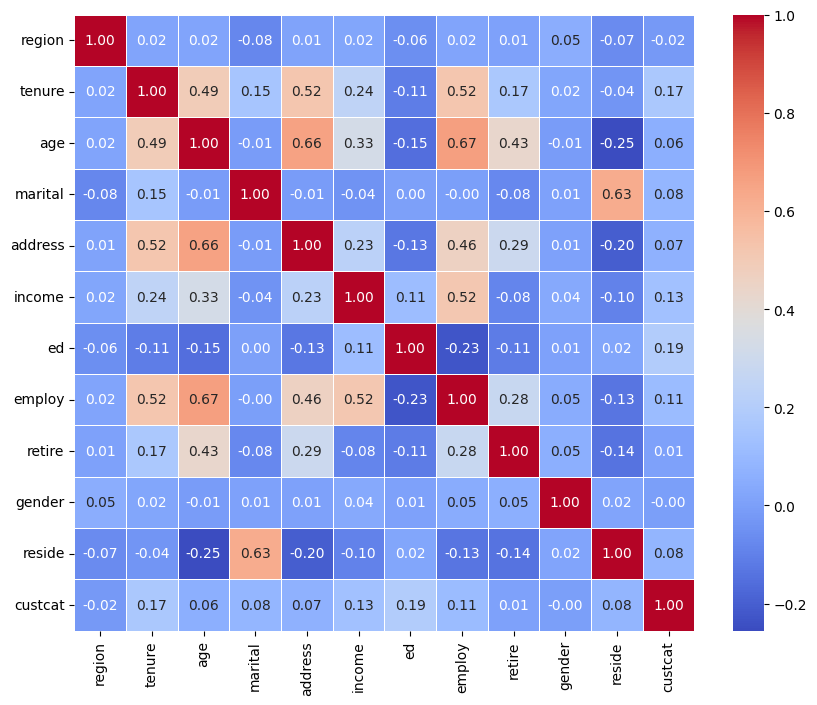

In [16]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

Cela nous montre que les caractéristiques « retraite » et « sexe » ont le moins d’effet sur custcat, tandis que « ed » et « tenure » ont le plus d’effet.

In [25]:
X = df.drop('custcat',axis=1)
y = df['custcat']

In [26]:
df.head(2)

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4


In [27]:
X_norm = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=4)

# **Entraînement** du modèle

In [28]:
k = 3
#Train Model and Predict
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_model = knn_classifier.fit(X_train,y_train)

Prédiction

In [29]:
yhat = knn_model.predict(X_test)

Evaluation avec accuraccy

In [30]:
print("Accuracy: ", accuracy_score(y_test, yhat))

Accuracy:  0.315


In [31]:
def test_perform(k):

  #Train Model and Predict
  knn_classifier = KNeighborsClassifier(n_neighbors=k)
  knn_model = knn_classifier.fit(X_train,y_train)
  yhat = knn_model.predict(X_test)
  print("Accuracy: ", accuracy_score(y_test, yhat))

In [39]:
test_perform(9)

Accuracy:  0.34


# **Choisir la valeur correcte de k**

K dans KNN correspond au nombre de plus proches voisins à examiner. Cependant, le choix de la valeur de « k » affecte clairement le modèle. Par conséquent, le choix approprié de la valeur de la variable k devient une tâche importante. La méthode générale consiste à entraîner le modèle sur un ensemble de différentes valeurs de k et à observer les performances du modèle entraîné sur l'ensemble de test. Le modèle présentant la meilleure valeur de score_précision est celui dont le paramètre k est idéal.

Vérifiez les performances du modèle pour 10 valeurs de k, comprises entre 1 et 9. Vous pouvez également évaluer la précision ainsi que l'écart type de précision afin d'obtenir une vue d'ensemble des performances du modèle.

In [35]:
Ks = 10
acc = np.zeros((Ks))
std_acc = np.zeros((Ks))
for n in range(1,Ks+1):
    #Train Model and Predict
    knn_model_n = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat = knn_model_n.predict(X_test)
    acc[n-1] = accuracy_score(y_test, yhat)
    std_acc[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

Tracez la précision du modèle pour un nombre différent de voisins. Vous pouvez maintenant tracer la précision du modèle et l'écart type pour identifier le modèle présentant la valeur k la plus adaptée.

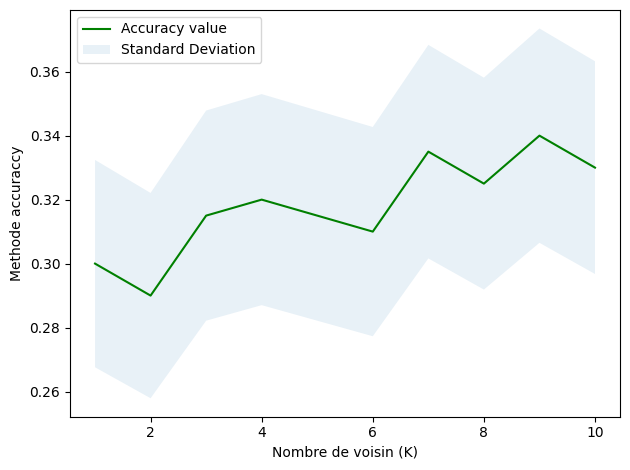

In [37]:
plt.plot(range(1,Ks+1),acc,'g')
plt.fill_between(range(1,Ks+1),acc - 1 * std_acc,acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy value', 'Standard Deviation'))
plt.ylabel('Methode accuraccy')
plt.xlabel('Nombre de voisin (K)')
plt.tight_layout()
plt.show()

In [38]:
print( "The best accuracy was with", acc.max(), "with k =", acc.argmax()+1)

The best accuracy was with 0.34 with k = 9


Exécutons le modèle d'apprentissage pour 30 valeurs de k, puis à nouveau pour 100 valeurs de k. Identifions la valeur de k la plus adaptée à ces données et la précision de l'ensemble de test pour ce modèle.

In [43]:
def test_k(Ks):
  acc = np.zeros((Ks))
  std_acc = np.zeros((Ks))
  for n in range(1,Ks+1):
    #Train Model and Predict
    knn_model_n = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat = knn_model_n.predict(X_test)
    acc[n-1] = accuracy_score(y_test, yhat)
    std_acc[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
  plt.plot(range(1,Ks+1),acc,'g')
  plt.fill_between(range(1,Ks+1),acc - 1 * std_acc,acc + 1 * std_acc, alpha=0.10)
  plt.legend(('Accuracy value', 'Standard Deviation'))
  plt.ylabel('Methode accuraccy')
  plt.xlabel('Nombre de voisin (K)')
  plt.tight_layout()
  plt.show()
  print( "The best accuracy was with", acc.max(), "with k =", acc.argmax()+1)

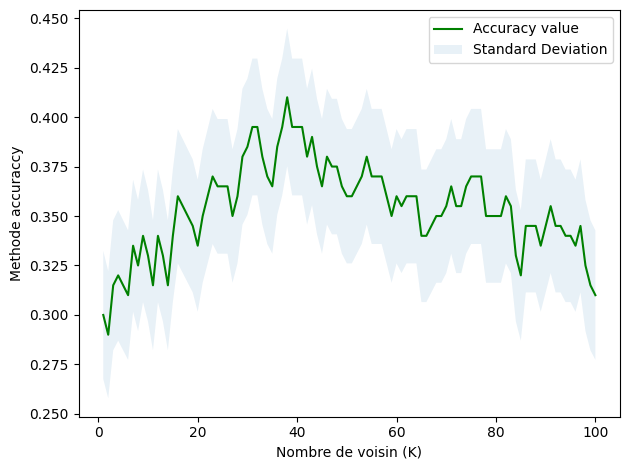

The best accuracy was with 0.41 with k = 38


In [46]:
test_k(100)

In [49]:
test_perform(38)

Accuracy:  0.41


Lorsque k est petit (par exemple, k = 1), le modèle est très sensible aux points individuels de l'ensemble de données. La prédiction pour chaque point est basée sur son plus proche voisin, ce qui peut conduire à des limites très spécifiques et flexibles. Cela entraîne un surapprentissage sur les données d'entraînement, ce qui signifie que le modèle fonctionnera très bien sur l'ensemble d'entraînement, atteignant potentiellement une précision de 100 %. Cependant, sa généralisation à des données inconnues peut être difficile. Lorsque k est grand, le modèle commence à prendre en compte davantage de voisins lors des prédictions. Cela a deux conséquences principales :

Lissage de la frontière de décision : La frontière de décision devient plus lisse, ce qui signifie que le modèle est moins sensible au bruit ou aux fluctuations des données d'entraînement.
Prédictions moins spécifiques : Avec un k plus grand, le modèle prend en compte davantage de voisins et effectue donc des prédictions plus généralisées, ce qui peut entraîner une classification parfaite de moins d'instances.
Par conséquent, le modèle commence à perdre en flexibilité et sa capacité à mémoriser les données d'entraînement (qui peut conduire à une précision parfaite avec un k petit) est réduite.